## **المهمة : تحليل بيانات استماع البودكاست**

### **الهدف من المشروع**:
تحليل سجلات استماع البودكاست لفهم سلوك المستخدمين وتقديم توصيات بسيطة للحلقات.

#### **المهام الاساسية**:

- تحليل البيانات الأولي ومعالجتها

- استكشاف سلوك الاستماع لدى المستخدمين وتمثيله بيانيًا

- اقتراح مقاييس إضافية تعزز فهم البيانات

- إنشاء دالة بسيطة لتوصية الحلقات المناسبة



### **1. تحميل البيانات وفحصها**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [45]:
# 1.1 Load data files
users_df = pd.read_csv("users.csv")
episodes_df = pd.read_csv("episodes.csv")
listens_df = pd.read_json("listens.json")

In [46]:
# 1.2 Inspect data structure
print("Users DataFrame:")
users_df.info()

print("\nEpisodes DataFrame:")
episodes_df.info()

print("\nListens DataFrame:")
listens_df.info()


Users DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  20 non-null     int64 
 1   age      20 non-null     int64 
 2   gender   20 non-null     object
 3   country  20 non-null     object
dtypes: int64(2), object(2)
memory usage: 772.0+ bytes

Episodes DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   episode_id  30 non-null     int64 
 1   title       30 non-null     object
 2   category    30 non-null     object
dtypes: int64(1), object(2)
memory usage: 852.0+ bytes

Listens DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   user_id 

In [47]:
# 1.3 Check for duplicate rows
for df, name in zip([users_df, episodes_df, listens_df], ["users", "episodes", "listens"]):
    dup_count = df.duplicated().sum()
    print(f"Number of duplicate rows in {name}: {dup_count}")

Number of duplicate rows in users: 0
Number of duplicate rows in episodes: 0
Number of duplicate rows in listens: 0


### **2. دمج البيانات وتجهيزها**

In [49]:
# 2.1 Merge tables on user_id and episode_id
merged_df = (
    listens_df
    .merge(users_df, on="user_id", how="left")
    .merge(episodes_df, on="episode_id", how="left")
    .sort_values(by="user_id")
    .reset_index(drop=True)
)

# View the first few rows of the merged data
print(merged_df.head(10))

   user_id  episode_id  duration_seconds  age  gender  country       title  \
0        1           8              1500   38  female  Morocco   Episode 8   
1        1          30              1800   38  female  Morocco  Episode 30   
2        1           1              1800   38  female  Morocco   Episode 1   
3        1          22               900   38  female  Morocco  Episode 22   
4        2          11              1500   30  female   Jordan  Episode 11   
5        2          19                 0   30  female   Jordan  Episode 19   
6        2          20               300   30  female   Jordan  Episode 20   
7        2           1               300   30  female   Jordan   Episode 1   
8        2          23              1800   30  female   Jordan  Episode 23   
9        2           9               900   30  female   Jordan   Episode 9   

   category  
0    Sports  
1    Sports  
2  Religion  
3   Society  
4    Sports  
5  Politics  
6   Society  
7  Religion  
8    Sports  
9

### **3. تحليل البيانات الاستكشافي**
#### 3.1 توزيع الاستماعات حسب الفئة

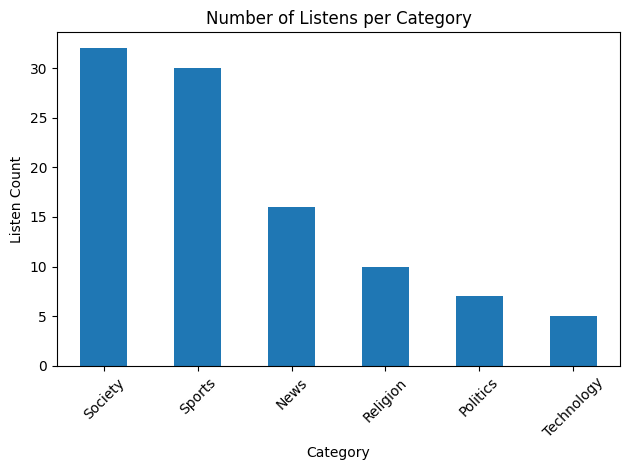

In [51]:
# Count listens per category and plot as bar chart
category_counts = merged_df.groupby('category').size().sort_values(ascending=False)

# Plot a bar chart
plt.figure()
category_counts.plot(kind='bar')
plt.title('Number of Listens per Category')
plt.xlabel('Category')
plt.ylabel('Listen Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 3.2 متوسط مدة الاستماع حسب الجنس

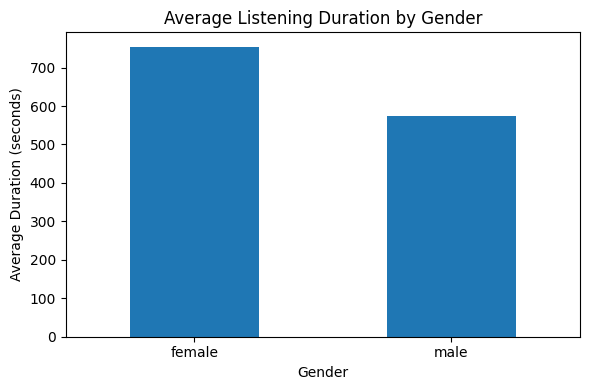

Difference (female - male): 180.77 seconds


In [15]:
# Compute average listening duration by gender
duration_by_gender = merged_df.groupby("gender")["duration_seconds"].mean()

duration_by_gender.plot(kind="bar", figsize=(6, 4))
plt.xlabel("Gender")
plt.ylabel("Average Duration (seconds)")
plt.title("Average Listening Duration by Gender")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Difference between female and male
difference = duration_by_gender.get('female', 0) - duration_by_gender.get('male', 0)
print(f"Difference (female - male): {difference:.2f} seconds")

#### 3.3 إجمالي الحلقات التي استمع إليها كل مستخدم

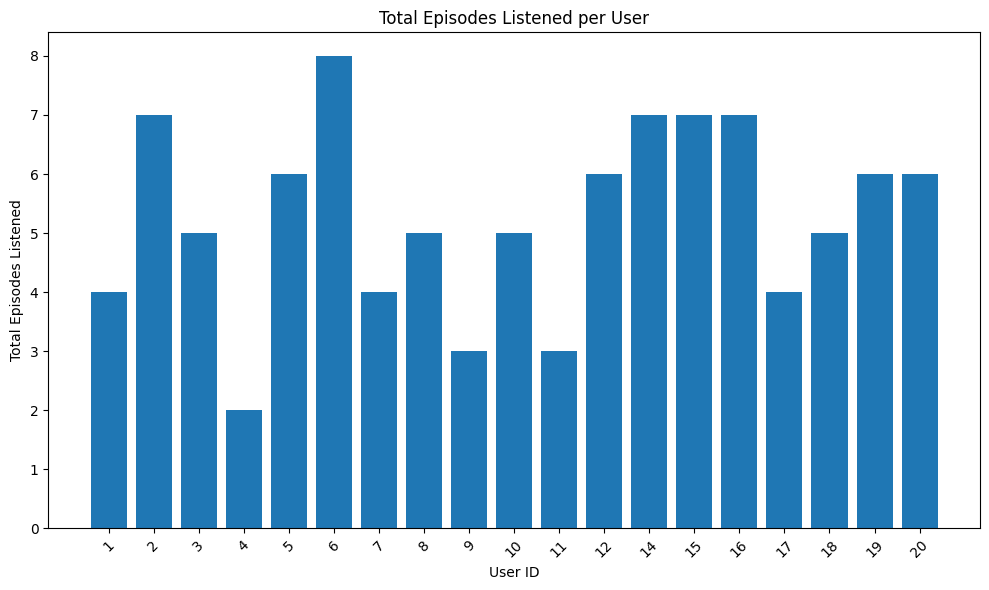

In [53]:
# Count total episodes listened for each user
user_total_listens = listens_df.groupby("user_id").size().reset_index(name="total_listens")

# Plot as bar chart
plt.figure(figsize=(10, 6))
plt.bar(user_total_listens["user_id"].astype(str), user_total_listens["total_listens"])
plt.xlabel("User ID")
plt.ylabel("Total Episodes Listened")
plt.title("Total Episodes Listened per User")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **4. اقتراح مقاييس إضافية**

**4.1 مؤشر تفاعل الديموغرافيات (Demographic Engagement Index):** تقييم مدى استماع كل مجموعة ديموغرافية للفئات المختلفة لتحديد الشرائح ذات أعلى مستويات التفاعل.

##### 4.1.1 عدد الاستماعات حسب العمر والفئة

<Figure size 1000x600 with 0 Axes>

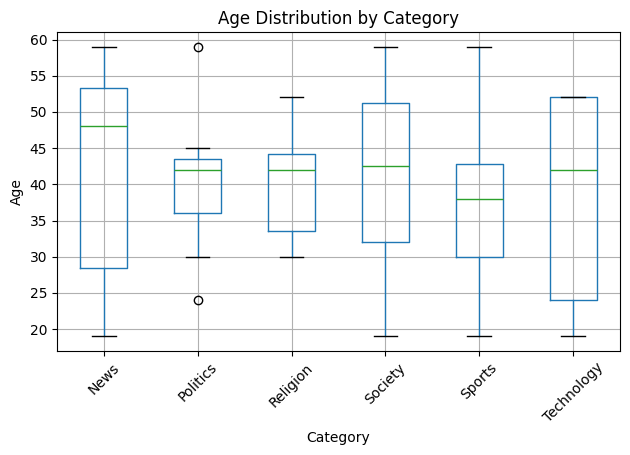

In [ ]:
# Summary stats of age per category
age_summary = merged_df.groupby('category')['age'].describe()

# Boxplot: age distribution by category
plt.figure(figsize=(10, 6))
merged_df.boxplot(column='age', by='category', rot=45)
plt.title('Age Distribution by Category')
plt.suptitle('')
plt.xlabel('Category')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


##### 4.1.2 عدد الاستماعات حسب الجنس والفئة

<Figure size 800x600 with 0 Axes>

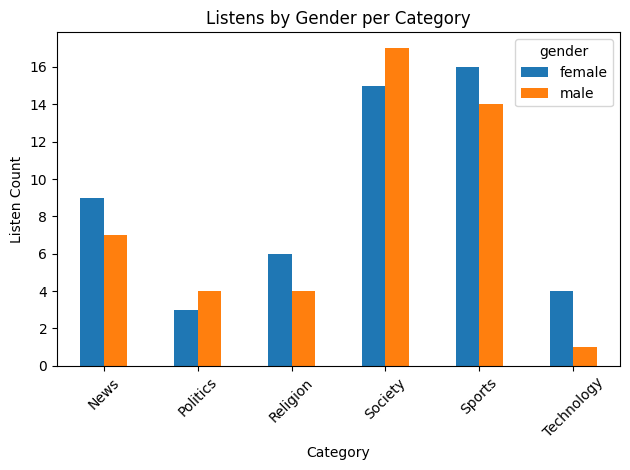

In [24]:
#Plot listens by gender per category
gender_counts = merged_df.groupby(['category','gender']).size().unstack(fill_value=0)
plt.figure(figsize=(8,6))
gender_counts.plot(kind='bar')
plt.title('Listens by Gender per Category')
plt.xlabel('Category')
plt.ylabel('Listen Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

| الفئة                    | الجنس                                       | العمر                            | ملاحظات رئيسة                                                             |
| ------------------------ | ------------------------------------------- | -------------------------------- | ------------------------------------------------------------------ |
| **الأخبار (News)**       | تستحوذ الإناث على 9 استماعات مقابل 7 للذكور | متوسط \~48 سنة (19–59)           | تصل إلى جمهور متنوّع الأجيال؛ حملات عامة تناسب جميع الفئات العمرية |
| **السياسة (Politics)**   | الذكور يتصدرون (4 مقابل 3)                  | متوسط \~42 سنة (24–59)           | محتوى معمّق ولغة رسمية تستهدف شريحة منتصف الأربعينات               |
| **الدين (Religion)**     | الإناث تفوق الذكور (6 مقابل 4)              | متوسط \~42 سنة (30–52)           | محتوى وسطّي يعكس قيم هذه الشريحة المستقرة                          |
| **المجتمع (Society)**    | الذكور يتفوقون قليلاً (17 مقابل 15)         | متوسط \~43 سنة (19–59)           | مواضيع جاذبة لجميع الأعمار مع تركيز على القضايا اليومية            |
| **الرياضة (Sports)**     | الإناث قليلاً (16 مقابل 14)                 | متوسط \~38 سنة (30–45)           | محتوى تفاعلي وفيديوهات قصيرة تناسب الشباب والنشطين                 |
| **التقنية (Technology)** | الإناث تتقدم (4 مقابل 1)                    | متوسط \~42 سنة مع تكتل بين 50–55 | حملات تعليمية وورش عمل رقمية تستهدف المحترفات وعشّاق التقنية       |


**4.2 تكرار الاستماع الفردي (Individual Listen Frequency):** قياس عدد المرات التي يعود فيها كل مستخدم إلى نفس الفئات بهدف تخصيص التوصيات بشكل أفضل.

0 3


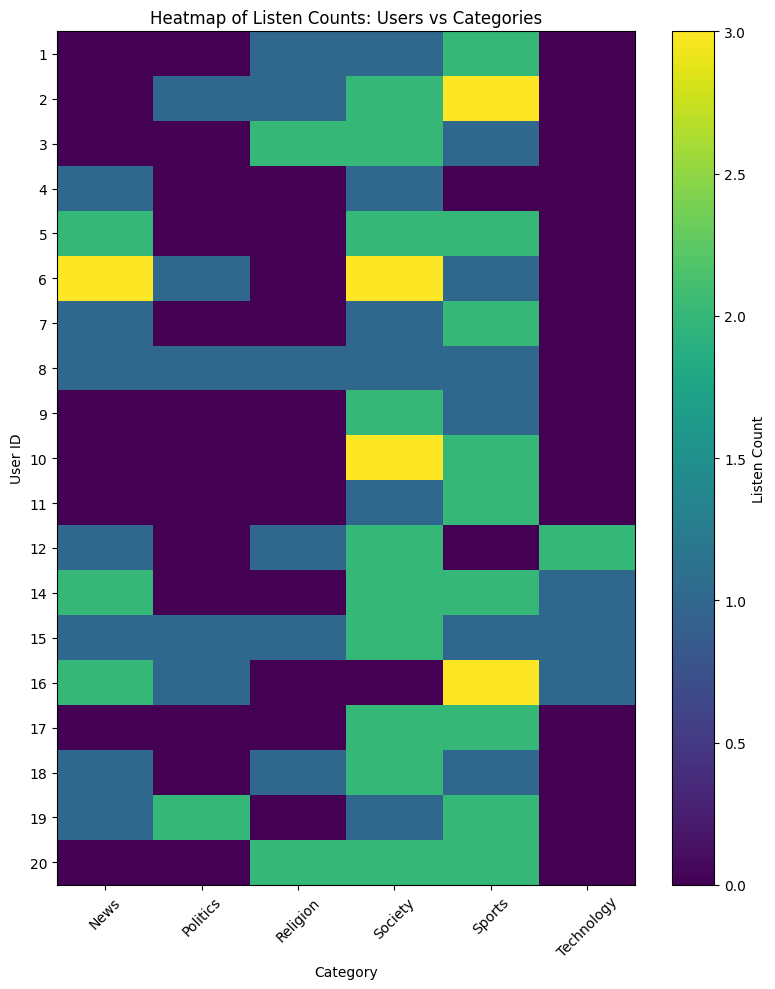

In [39]:
import matplotlib.colors as mcolors

# Build user × category listen-count matrix (no clipping)
user_cat_matrix = merged_df.groupby(['user_id', 'category']) \
                          .size() \
                          .unstack(fill_value=0)


# Extract raw values and compute actual min/max
data = user_cat_matrix.values
min_count, max_count = data.min(), data.max()
print(min_count, max_count)

# Create a Normalize instance to map data linearly to the colormap
norm = mcolors.Normalize(vmin=min_count, vmax=max_count)

# Draw heatmap of the full listen-count range
plt.figure(figsize=(8, 10))
plt.imshow(
    data,
    aspect='auto',
    interpolation='nearest',
    norm=norm             # ensure full data range is used
)
plt.colorbar(label='Listen Count')
plt.xticks(
    range(len(user_cat_matrix.columns)),
    user_cat_matrix.columns,
    rotation=45
)
plt.yticks(
    range(len(user_cat_matrix.index)),
    user_cat_matrix.index
)
plt.title('Heatmap of Listen Counts: Users vs Categories')
plt.xlabel('Category')
plt.ylabel('User ID')
plt.tight_layout()
plt.show()





| الفئة          | أقصى تكرار استماع لمستخدم (مرات) | عدد المستخدمين النشطين | ملاحظات رئيسية                                               |
| -------------- | -------------------------------- | ----------------------- | ------------------------------------------------------------ |
| **Society**    | 3                                | عالية                   | أكثر فئة تفاعلاً، تستقطب معظم المستخدمين وتكرارهم مرتفع      |
| **Sports**     | 3                                | عالية                   | تفاعل شبابي قوي، تكرار مماثل لفئة المجتمع                    |
| **News**       | 2                                | متوسطة                  | تفاعل معتدل، توجد فرصة لزيادة التكرار عبر محتوى جذاب         |
| **Religion**   | 2                                | متوسطة                  | جمهور متماسك، محتوى قيم يمكن تعزيزه بجلسات إضافية            |
| **Politics**   | 2                                | منخفضة                  | تفاعل محدود؛ محتوى معمّق وأسئلة للنقاش قد تزيد التكرار       |
| **Technology** | 2                                | قليلة                   | يحتاج لتوعية وتجارب عملية (tutorials, demos) لجذب المستخدمين |

 **عدد المستخدمين النشطين** = عدد المستخدمين الذين استمعوا للفئة مرة أو أكثر.


### **5. نظام توصية بسيط**

#### 5.1 دالة التوصية


In [57]:
def recommend_episodes(user_id: int,
                       listens_df: pd.DataFrame,
                       episodes_df: pd.DataFrame,
                       n: int = 3) -> pd.DataFrame:
    """
    Recommend up to n episodes for a user based on their top listened categories.
    """
    # 1. Merge to get category info on each listen
    listens = listens_df.merge(
        episodes_df[['episode_id', 'category']],
        on='episode_id',
        how='left'
    )

    # 2. Which episodes the user has already listened to
    user_history = listens[listens['user_id'] == user_id]['episode_id'].unique()

    # 3. Count the user's listens per category, sorted descending
    user_cat_counts = (
        listens[listens['user_id'] == user_id]
        .groupby('category')
        .size()
        .sort_values(ascending=False)
    )

    if user_cat_counts.empty:
        # Fallback: no history → top-n episodes by overall listens
        top_overall = (
            listens
            .groupby('episode_id')
            .size()
            .sort_values(ascending=False)
            .head(n)
            .index
        )
        return (
            episodes_df[episodes_df['episode_id'].isin(top_overall)]
            .drop_duplicates()
            .head(n)
            .loc[:, ['episode_id', 'title', 'category']]
        )

    # 4. Get the user's top categories
    top_categories = user_cat_counts.index.tolist()

    # 5. Filter episodes in those categories, excluding history
    candidates = episodes_df[
        (episodes_df['category'].isin(top_categories)) &
        (~episodes_df['episode_id'].isin(user_history))
    ]

    # 6. Select the first n episodes
    recommendations = candidates.drop_duplicates(subset=['episode_id']).head(n)

    return recommendations[['episode_id', 'title', 'category']]


#### 5.2 امثلة للتوصيات

In [58]:
recs = recommend_episodes(15, listens_df, episodes_df, n=3)
print(recs)

   episode_id      title    category
0           1  Episode 1    Religion
1           2  Episode 2  Technology
4           5  Episode 5    Politics
